Changes Done:   
1. Removed the DC i.e 
2. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
low_0_data =  pd.read_csv("fan_0_weight_0_speed_0.csv")

In [22]:
def analyse_data(file, fan_mode):
    """
    file - file name 
    fan_mode - decsription of fan speed and whether weight was attached to the blades - yes-1, no -0
    """
    ##
    ##
    print(file.head())
    print("\n No of records :\n")
    print(file.shape)
    ##
    print("\n Summary ")
    print(file.describe())
    ##
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.hist(file['x']- file['x'].mean())
    #plt.axvline(file['x'].mean(), linestyle = '--', color = 'black', label = 'mean')
    plt.xlabel('x')
    plt.subplot(1,3,2)
    plt.hist(file['y']- file['y'].mean())
    #plt.axvline(file['y'].mean(), linestyle = '--', color = 'black', label = 'mean')
    plt.xlabel('y')
    plt.subplot(1,3,3)
    plt.hist(file['z'] - file['z'].mean())
    #plt.axvline(file['z'].mean(), linestyle = '--', color = 'black', label = 'mean')
    plt.xlabel('z')
    plt.suptitle(fan_mode)
    ##
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.scatter(file['x'], file['y'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1,3,2)
    plt.scatter(file['y'], file['z'])
    plt.xlabel('y')
    plt.ylabel('z')
    plt.subplot(1,3,3)
    plt.scatter(file['z'], file['x'])
    plt.xlabel('z')
    plt.ylabel('x')
    

          x         y         z  count  weight  speed
0 -0.012695  0.203125  0.970703      0       0      0
1  0.000488  0.208008  0.979981      0       0      0
2 -0.027344  0.196289  0.984375      0       0      0
3  0.005371  0.217285  0.991699      0       0      0
4 -0.020020  0.199219  0.980469      0       0      0

 No of records :

(116800, 6)

 Summary 
                   x              y              z          count    weight  \
count  116800.000000  116800.000000  116800.000000  116800.000000  116800.0   
mean       -0.012222       0.204498       0.979007     291.500000       0.0   
std         0.009009       0.007093       0.005143     168.586753       0.0   
min        -0.039063       0.187500       0.937500       0.000000       0.0   
25%        -0.020508       0.198730       0.975586     145.750000       0.0   
50%        -0.011719       0.202148       0.979004     291.500000       0.0   
75%        -0.003906       0.210449       0.982422     437.250000       0.0   
ma

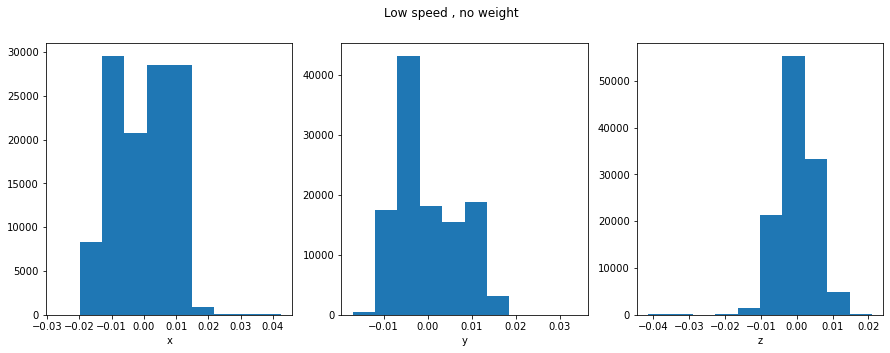

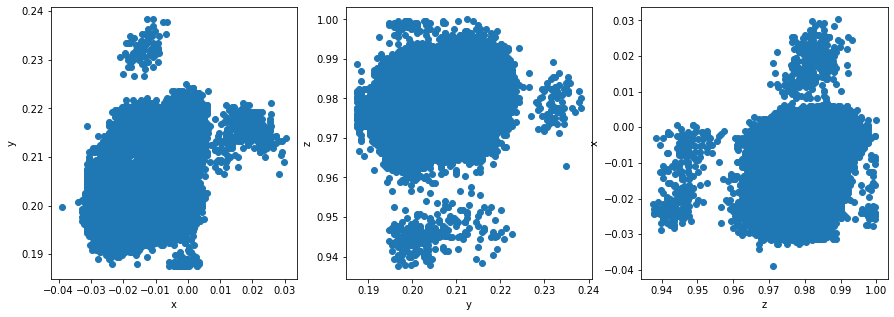

In [23]:
analyse_data(low_0_data , "Low speed , no weight")

In [24]:
## fan 0 , weight 0 deploy records
low_0_deploy_data = pd.read_csv("fan_0_weight_0_speed_0_deploy.csv")

          x         y         z  count  weight  speed
0  0.000000  0.197754  0.961426      0       0      0
1  0.013672  0.210449  0.997559      0       0      0
2  0.003418  0.200684  0.985840      0       0      0
3  0.015625  0.198242  0.973145      0       0      0
4  0.004883  0.210449  0.986328      0       0      0

 No of records :

(57000, 6)

 Summary 
                  x             y             z         count   weight  \
count  57000.000000  57000.000000  57000.000000  57000.000000  57000.0   
mean       0.008180      0.202258      0.982511    142.000000      0.0   
std        0.007126      0.006984      0.007640     82.272629      0.0   
min       -0.031250      0.166016      0.937988      0.000000      0.0   
25%        0.002930      0.197754      0.977539     71.000000      0.0   
50%        0.008301      0.202148      0.982422    142.000000      0.0   
75%        0.013184      0.207031      0.987305    213.000000      0.0   
max        0.052734      0.243164      1.02

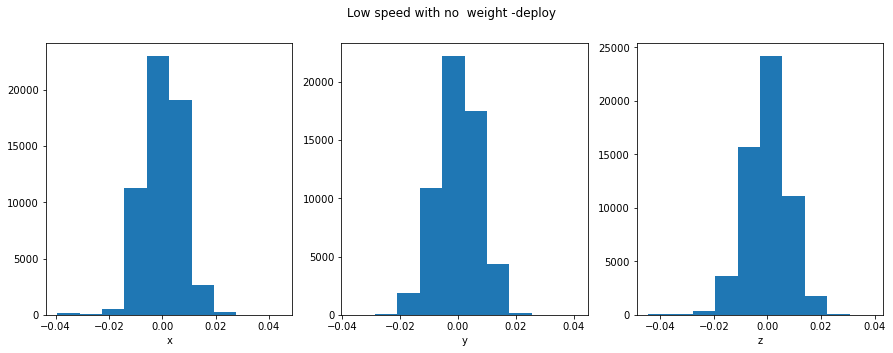

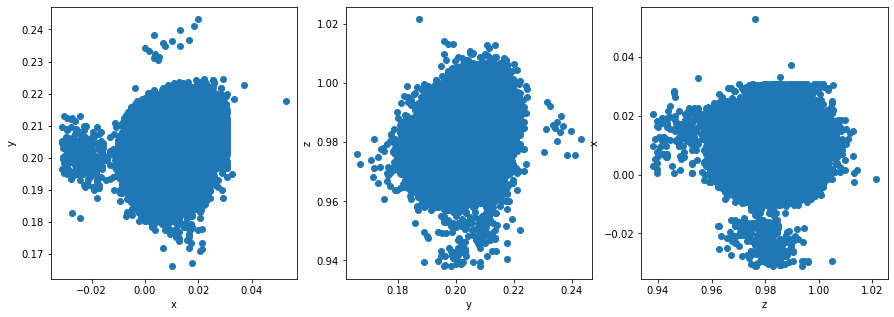

In [25]:
analyse_data(low_0_deploy_data , "Low speed with no  weight -deploy")

In [26]:
low_1_data =  pd.read_csv("fan_0_weight_1_speed_0.csv")

          x         y         z  count  weight  speed
0 -0.019043  0.201660  0.974609      0       1      0
1 -0.019043  0.189453  0.975586      0       1      0
2 -0.018555  0.192871  0.982422      0       1      0
3 -0.020508  0.192383  0.979004      0       1      0
4 -0.020996  0.193359  0.976563      0       1      0

 No of records :

(115800, 6)

 Summary 
                   x              y              z          count    weight  \
count  115800.000000  115800.000000  115800.000000  115800.000000  115800.0   
mean       -0.019737       0.192804       0.980419     289.000000       1.0   
std         0.005470       0.005329       0.005580     167.143375       0.0   
min        -0.054688       0.156250       0.937988       0.000000       1.0   
25%        -0.023926       0.189453       0.976563     144.000000       1.0   
50%        -0.019531       0.192871       0.980469     289.000000       1.0   
75%        -0.015625       0.196289       0.983887     434.000000       1.0   
ma

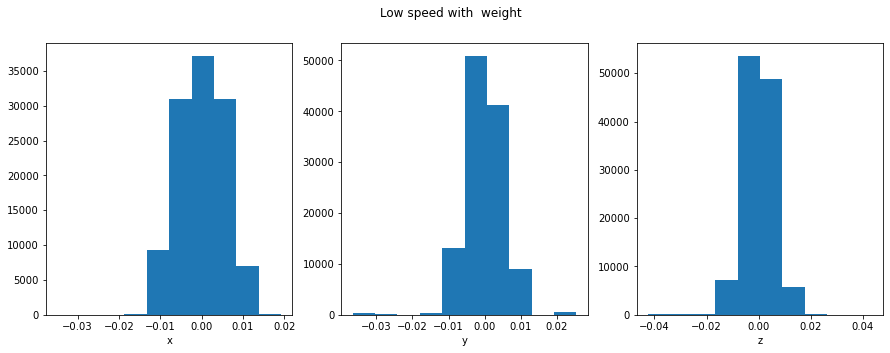

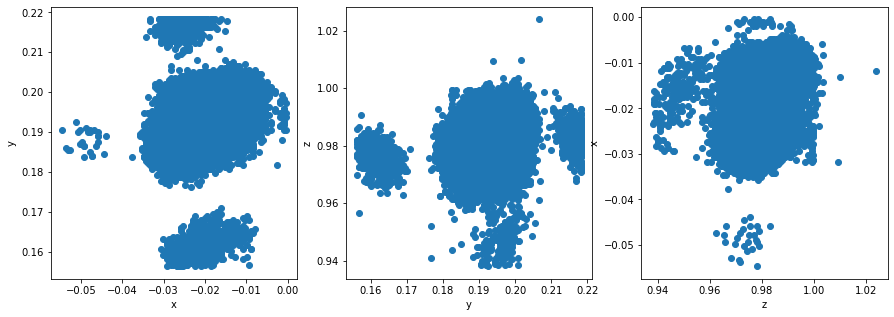

In [27]:
analyse_data(low_1_data , "Low speed with  weight")

The addition of weight on the fan blade causes the x , y and z accelerometer readings to vary as shown above.  
The mean value for z remains nearly the same but the values for x has changed a lot with most of the values negative.  
With the anomaly , x and z values appears to have guassian distribution.  

In [28]:
def line_plots_xyz(file1,file2, speed):
    """
    file1 - input file that contains x,y,z values for normal operation of the fan
    file2 - input file that contains x,y,z values with anomaly
    speed - the fan speed
    
    """
    plt.figure(figsize = (15,5))
    x_reformed_1 = file1['x'] - file1['x'].mean()
    x_reformed_1.plot(label = 'normal readings w/o dc')
    x_reformed_2 = file2['x'] - file2['x'].mean()
    x_reformed_2.plot(label = 'with anomaly w/o dc')
    plt.legend()
    plot_title = 'x values for ' + speed
    plt.title(plot_title)
    ##
    plt.figure(figsize = (15,5))
    y_reformed_1 = file1['y'] - file1['y'].mean()
    y_reformed_1.plot(label = 'normal readings w/o dc')
    y_reformed_2 = file2['y'] - file2['y'].mean()
    y_reformed_2.plot(label = 'with anomaly w/o dc')
    plt.legend()
    plot_title = 'y values for ' + speed
    plt.title(plot_title)
    ##
    plt.figure(figsize = (15,5))
    z_reformed_1 = file1['z'] - file1['z'].mean()
    z_reformed_1.plot(label = 'normal readings w/o dc')
    z_reformed_2 = file2['z'] - file2['z'].mean()
    z_reformed_2.plot(label = 'with anomaly w/o dc')
    plt.legend()
    plot_title = 'z values for ' + speed
    plt.title(plot_title)
    

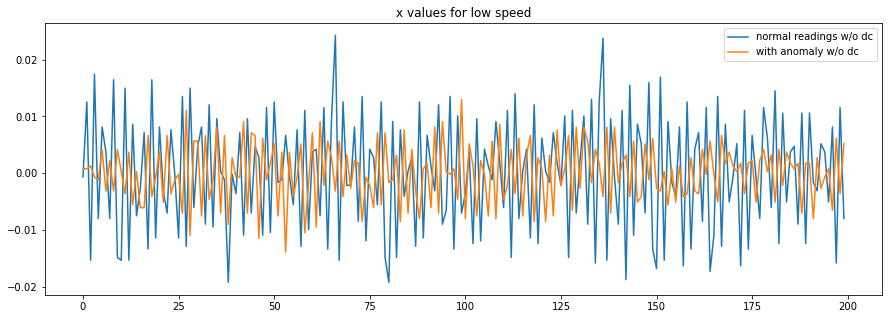

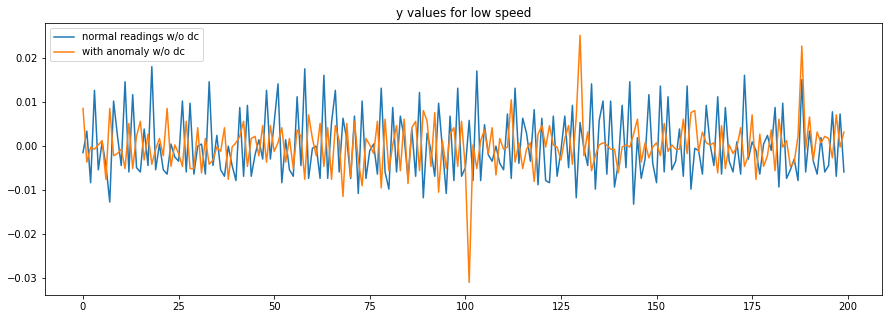

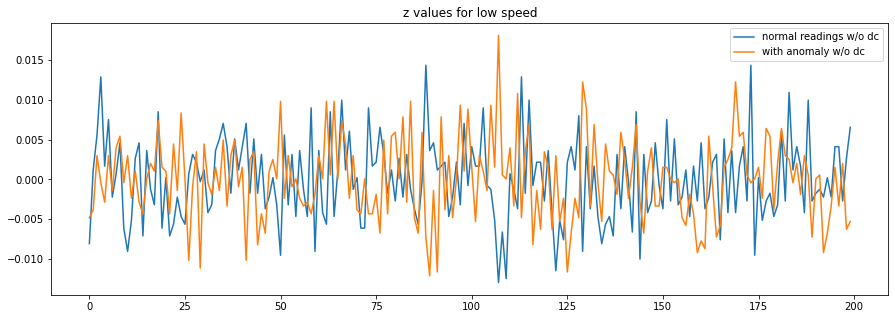

In [40]:
line_plots_xyz(low_0_data[:200], low_1_data[:200], 'low speed')

In [29]:
medium_0_data =  pd.read_csv("fan_0_weight_0_speed_1.csv")

          x         y         z  count  weight  speed
0 -0.041016  0.184570  0.969238      0       0      1
1  0.014648  0.223633  0.985352      0       0      1
2 -0.031738  0.186035  0.975586      0       0      1
3  0.011230  0.211914  0.994141      0       0      1
4 -0.007813  0.201660  0.975098      0       0      1

 No of records :

(117400, 6)

 Summary 
                   x              y              z         count    weight  \
count  117400.000000  117400.000000  117400.000000  117400.00000  117400.0   
mean       -0.011210       0.205971       0.978428     293.00000       0.0   
std         0.020283       0.015804       0.008887     169.45278       0.0   
min        -0.062500       0.156250       0.937500       0.00000       0.0   
25%        -0.029785       0.191895       0.972168     146.00000       0.0   
50%        -0.010742       0.205078       0.978516     293.00000       0.0   
75%         0.007324       0.220215       0.984863     440.00000       0.0   
max       

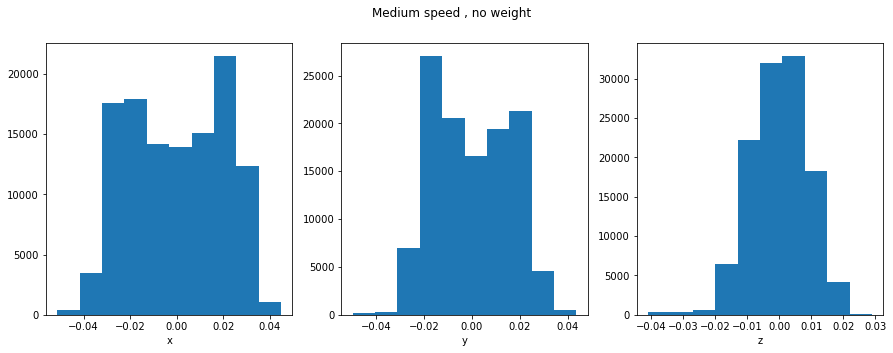

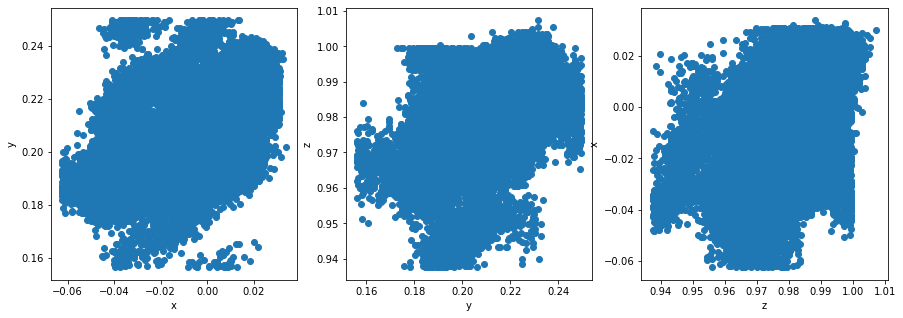

In [30]:
analyse_data(medium_0_data, "Medium speed , no weight")

In [31]:
medium_1_data =  pd.read_csv("fan_0_weight_1_speed_1.csv")

          x         y         z  count  weight  speed
0 -0.035156  0.183105  0.972168      0       1      1
1 -0.023438  0.199219  0.974121      0       1      1
2  0.001953  0.212402  0.990723      0       1      1
3 -0.041016  0.183105  0.963867      0       1      1
4  0.001953  0.220703  1.000000      0       1      1

 No of records :

(116600, 6)

 Summary 
                   x              y              z          count    weight  \
count  116600.000000  116600.000000  116600.000000  116600.000000  116600.0   
mean       -0.019599       0.197043       0.979155     291.000000       1.0   
std         0.013747       0.010812       0.010275     168.298078       0.0   
min        -0.062500       0.156250       0.937500       0.000000       1.0   
25%        -0.030273       0.188965       0.972168     145.000000       1.0   
50%        -0.020020       0.197266       0.979004     291.000000       1.0   
75%        -0.008789       0.205078       0.986328     437.000000       1.0   
ma

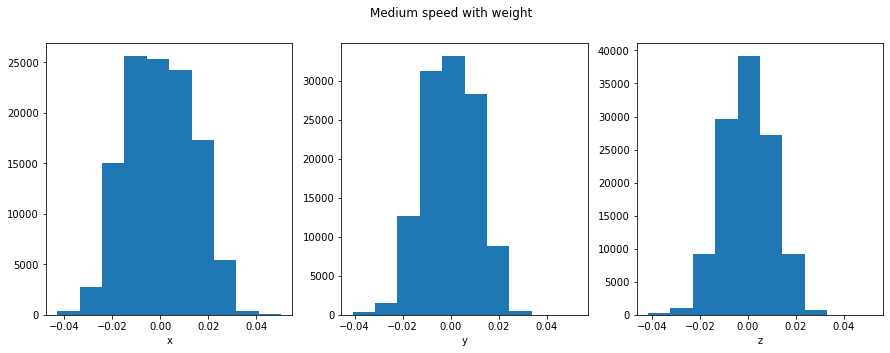

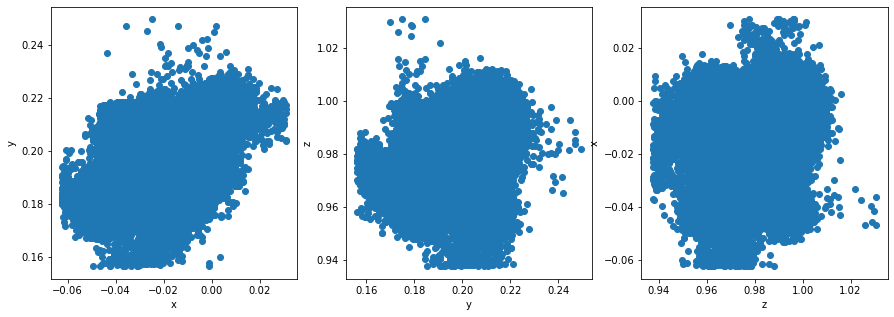

In [32]:
analyse_data(medium_1_data, "Medium speed with weight")

The addition of weight on the fan blade causes the x , y and z accelerometer readings to vary as shown above.    
  

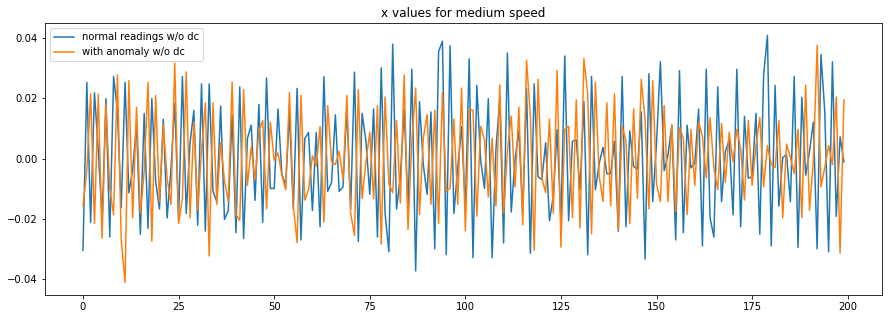

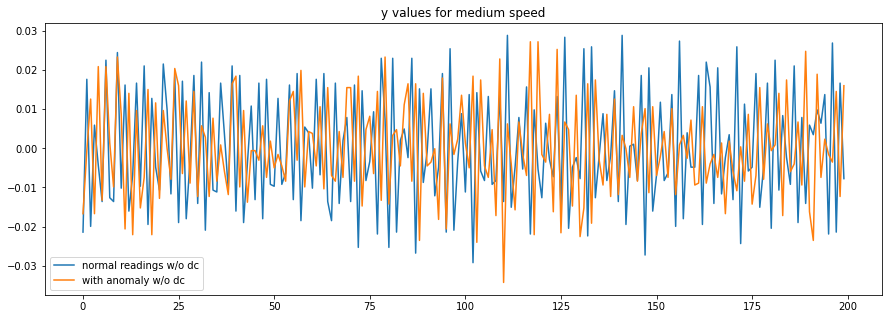

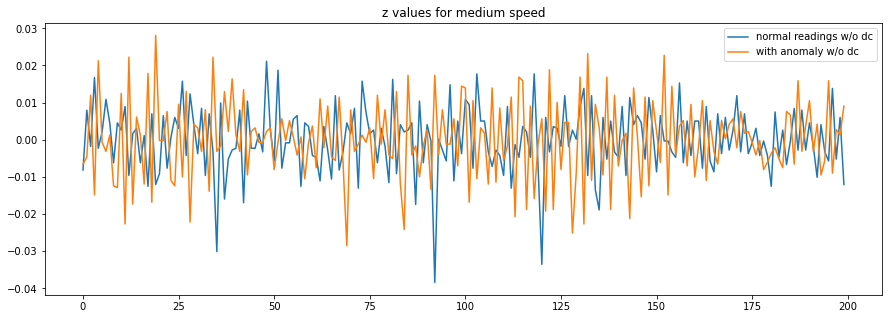

In [41]:
line_plots_xyz(medium_0_data[:200], medium_1_data[:200], 'medium speed')

In [42]:
high_0_data =  pd.read_csv("fan_0_weight_0_speed_2.csv")

          x         y         z  count  weight  speed
0  0.047363  0.246094  0.973633      0       0      2
1 -0.065918  0.157227  0.959473      0       0      2
2  0.034180  0.248535  0.992676      0       0      2
3 -0.039063  0.196289  0.958008      0       0      2
4 -0.020020  0.217285  0.985840      0       0      2

 No of records :

(117800, 6)

 Summary 
                   x              y              z          count    weight  \
count  117800.000000  117800.000000  117800.000000  117800.000000  117800.0   
mean       -0.010475       0.206425       0.977762     294.000000       0.0   
std         0.039907       0.032709       0.016456     170.030131       0.0   
min        -0.093750       0.125000       0.907715       0.000000       0.0   
25%        -0.048340       0.176270       0.964356     147.000000       0.0   
50%        -0.011719       0.210938       0.979004     294.000000       0.0   
75%         0.027832       0.235840       0.991211     441.000000       0.0   
ma

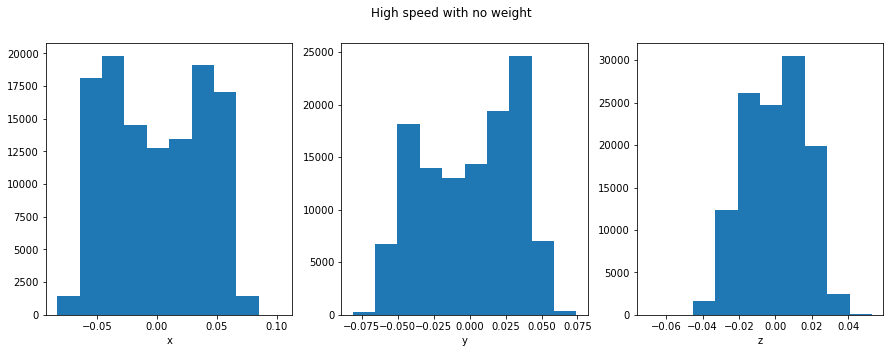

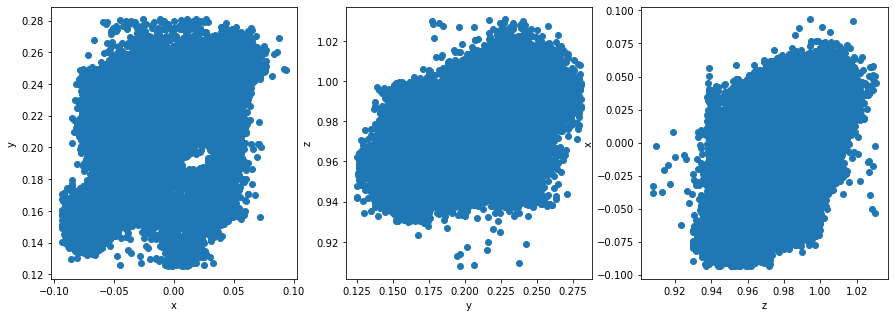

In [43]:
analyse_data(high_0_data, "High speed with no weight")

In [44]:
high_1_data =  pd.read_csv("fan_0_weight_1_speed_2.csv")

          x         y         z  count  weight  speed
0 -0.056641  0.228516  0.965820      0       1      2
1 -0.011719  0.234863  0.971680      0       1      2
2 -0.081543  0.199707  0.964844      0       1      2
3  0.000977  0.261719  0.997559      0       1      2
4 -0.068359  0.203613  0.965820      0       1      2

 No of records :

(116800, 6)

 Summary 
                   x              y              z          count    weight  \
count  116800.000000  116800.000000  116800.000000  116800.000000  116800.0   
mean       -0.040617       0.232057       0.971611     291.500000       1.0   
std         0.035932       0.031004       0.014779     168.586753       0.0   
min        -0.125000       0.156250       0.906250       0.000000       1.0   
25%        -0.074219       0.204102       0.959473     145.750000       1.0   
50%        -0.041504       0.235840       0.972168     291.500000       1.0   
75%        -0.006836       0.259766       0.983398     437.250000       1.0   
ma

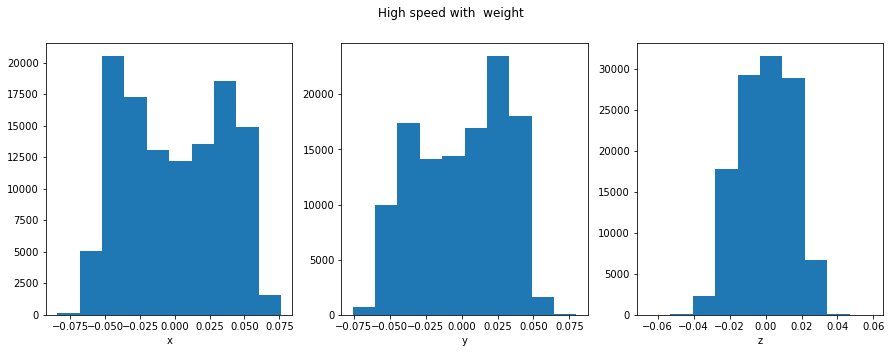

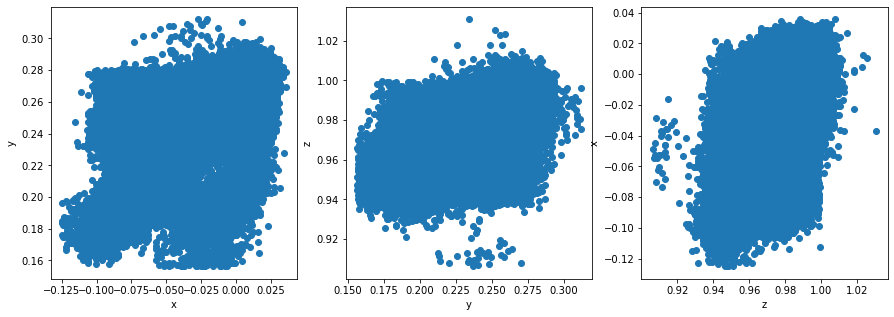

In [45]:
analyse_data(high_1_data, "High speed with  weight")

'x' , 'y' and 'z' value distribution is  different at 'high' speed.
Not much variation seen in y and 'z' values with addition of weight.    

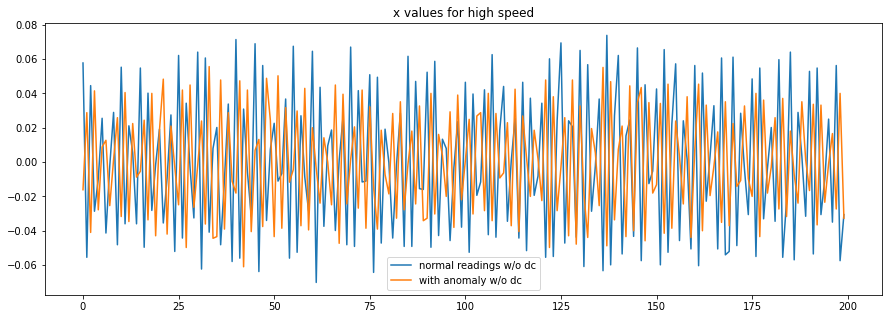

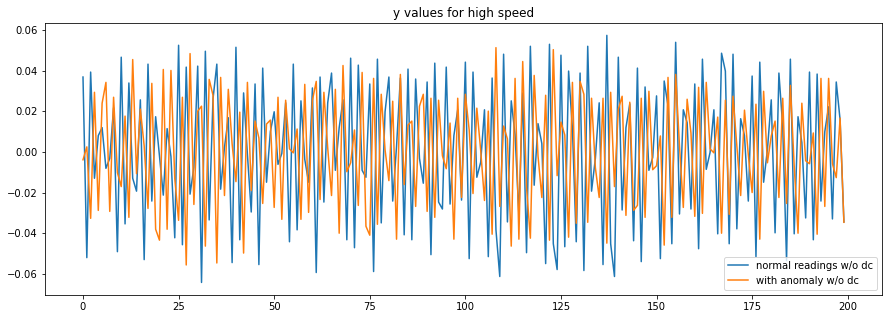

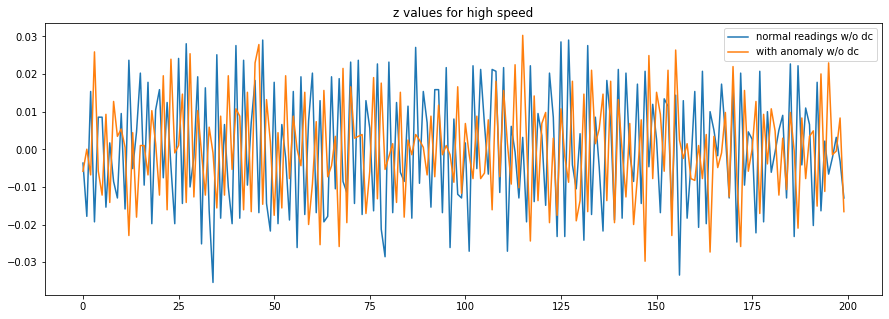

In [46]:
line_plots_xyz(high_0_data[:200], high_1_data[:200], 'high speed')

In [55]:
def plot_mean_values(file1, file2, column, fan_speed):
    """
    function to plot the mean values for every 200 records of the accelerometer readings. 
    file1 - file containing non weight data 
    file2 - file containing weight data 
    fan_speed - speed of the fan - low, medium or high
    """
    
    plt.figure(figsize = (15,5))
    file1.groupby('count')[column].mean().plot(label = 'weight =0')
    file2.groupby('count')[column].mean().plot(color = 'red', label = 'weight = 1')
    plt.legend()
    title = "Mean "+ column + " values for " +fan_speed + " fan speed." 
    plt.title(title)
    plt.show()
    

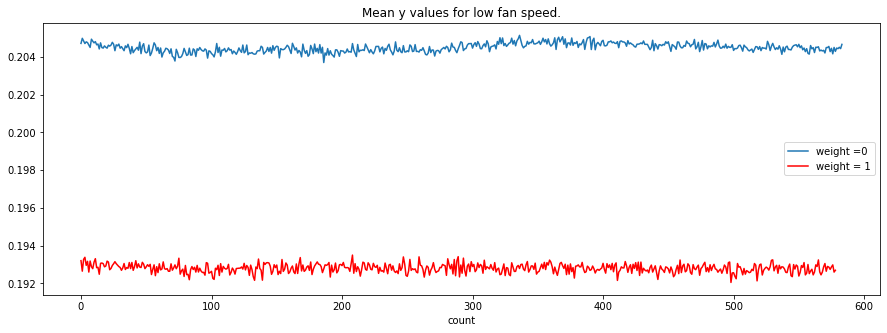

In [56]:
plot_mean_values(low_0_data, low_1_data , 'y', "low")

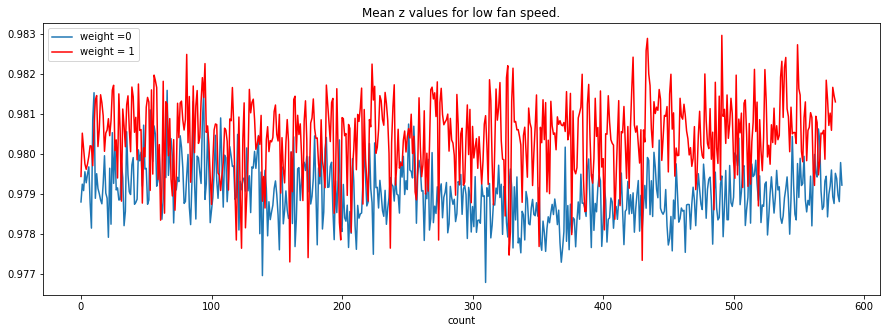

In [57]:
plot_mean_values(low_0_data, low_1_data , 'z', "low")

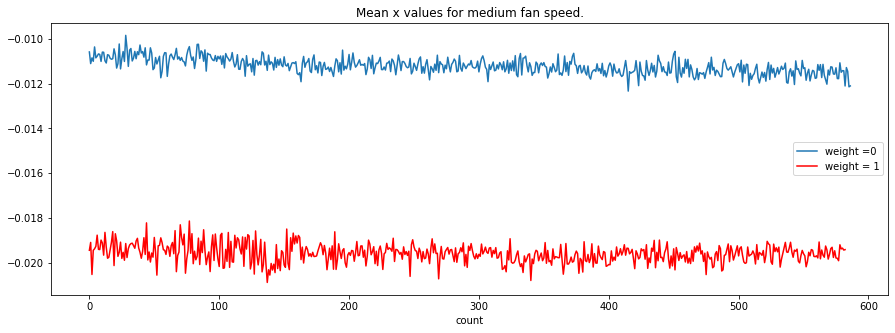

In [58]:
plot_mean_values(medium_0_data, medium_1_data , 'x', "medium")

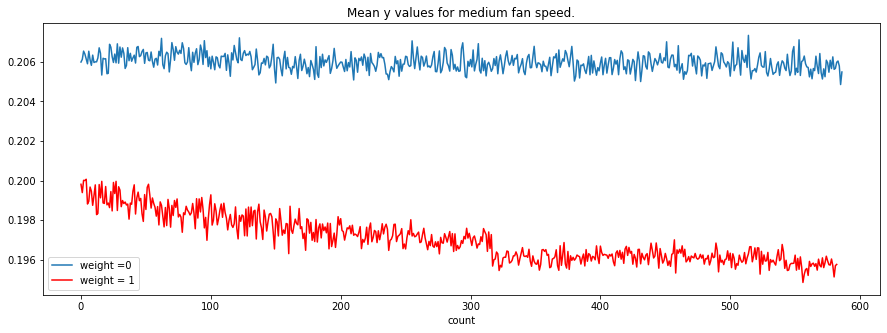

In [59]:
plot_mean_values(medium_0_data, medium_1_data , 'y', "medium")

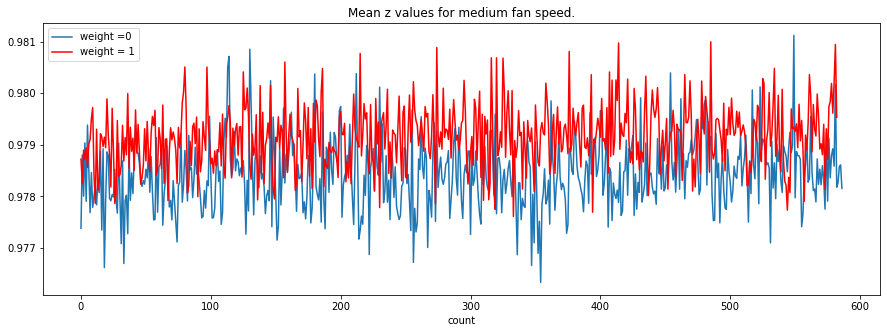

In [60]:
plot_mean_values(medium_0_data, medium_1_data , 'z', "medium")

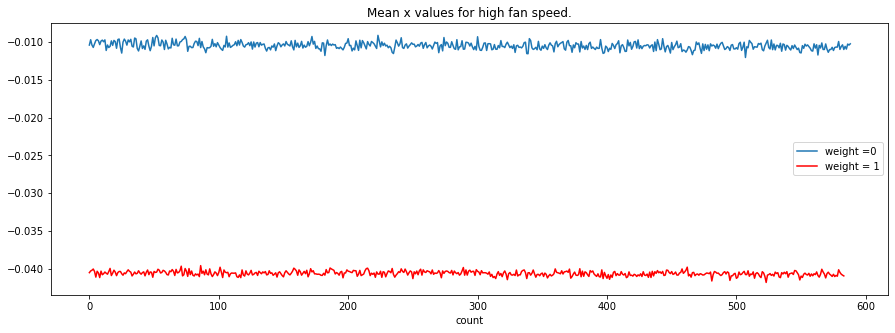

In [61]:
plot_mean_values(high_0_data, high_1_data , 'x', "high")

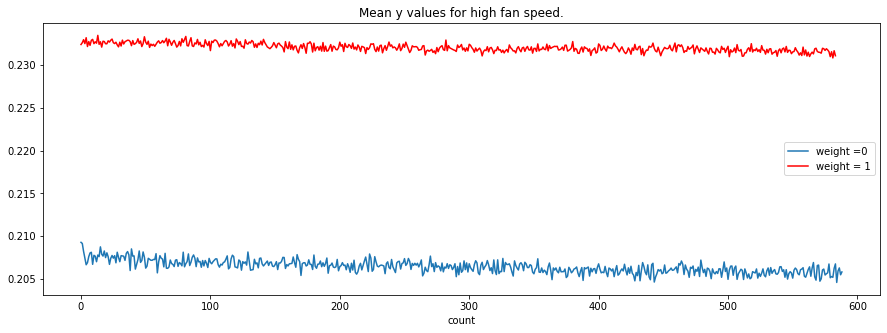

In [62]:
plot_mean_values(high_0_data, high_1_data , 'y', "high")

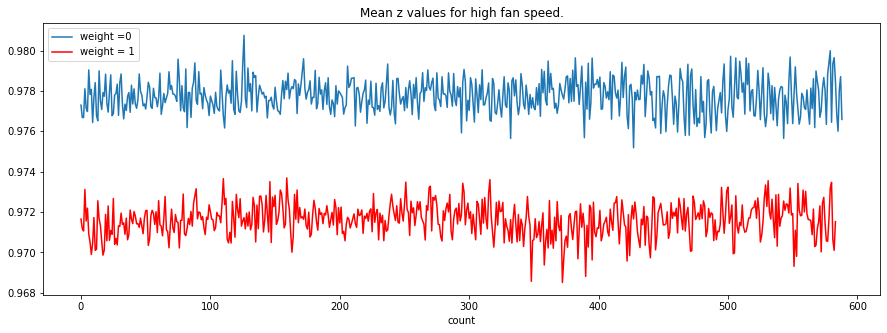

In [63]:
plot_mean_values(high_0_data, high_1_data , 'z', "high")

When the mean values of 200 samples are plotted as above, the shift in mean values can be clearly depicted for anomaly records.  

In [ ]:
## plot mean absolute deviation 


In [88]:
def plot_mad_values(file1, file2, column, fan_speed):
    """
    function to plot the mean values for every 200 records of the accelerometer readings. 
    file1 - file containing non weight data 
    file2 - file containing weight data 
    fan_speed - speed of the fan - low, medium or high
    """
    
    plt.figure(figsize = (15,5))
    ##
    file1.groupby('count')['new'].mad().plot(label = 'weight =0')
    file2.groupby('count')['new'].mad().plot(color = 'red', label = 'weight = 1')
    plt.legend()
    title = "MAD " +  column + " values for " +fan_speed + " fan speed." 
    plt.title(title)
    plt.show()
    

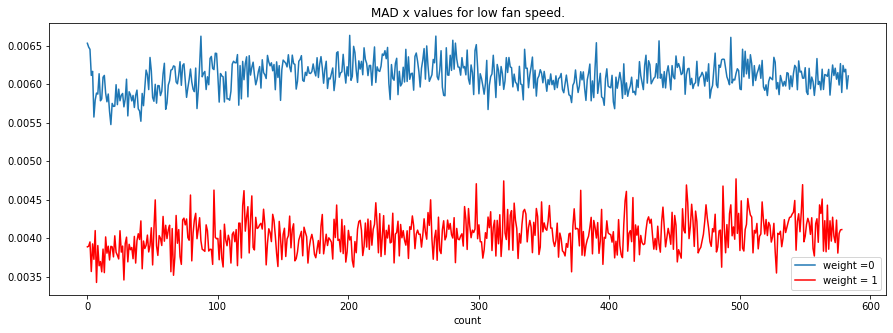

In [89]:
plot_mad_values(low_0_data, low_1_data , 'x', "low")

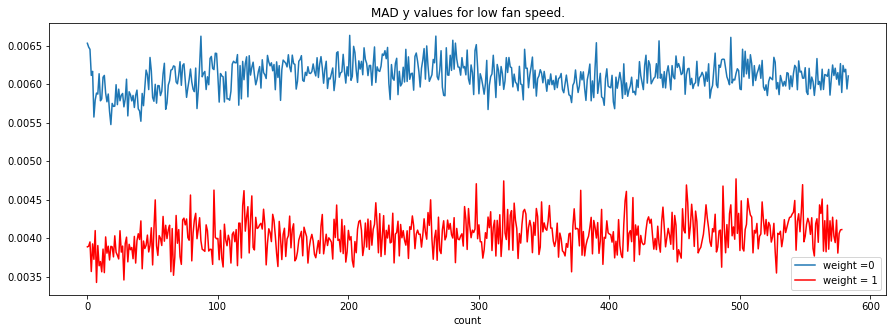

In [90]:
plot_mad_values(low_0_data, low_1_data , 'y', "low")

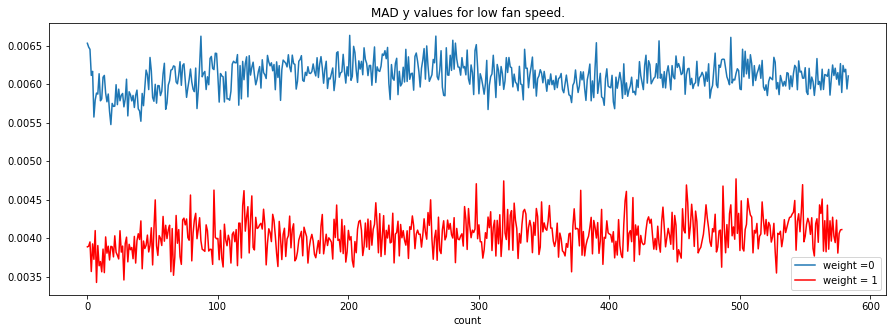

In [71]:
plot_mad_values(low_0_data, low_1_data , 'y', "low")

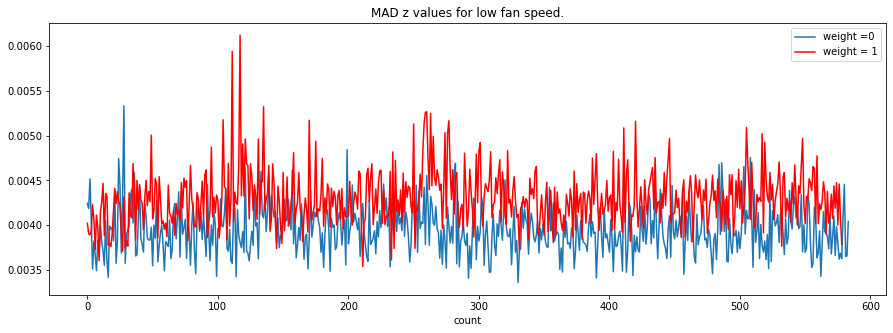

In [72]:
plot_mad_values(low_0_data, low_1_data , 'z', "low")

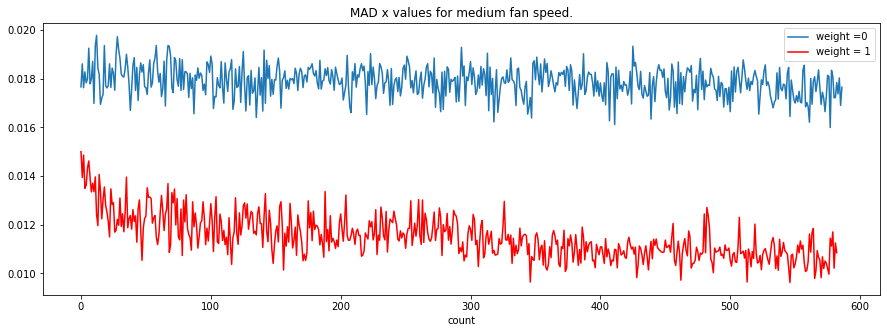

In [73]:
plot_mad_values(medium_0_data, medium_1_data , 'x', "medium")

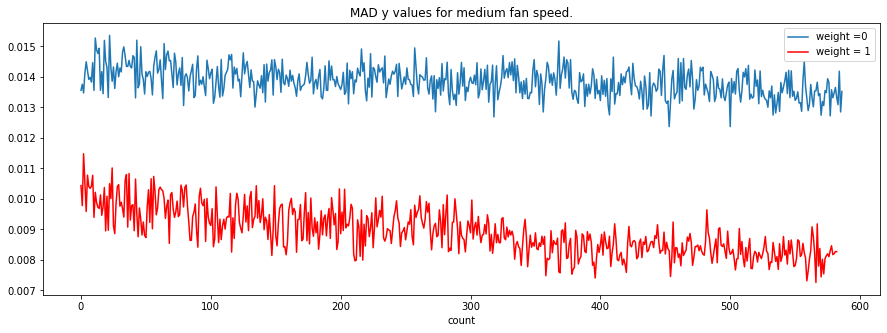

In [74]:
plot_mad_values(medium_0_data, medium_1_data , 'y', "medium")

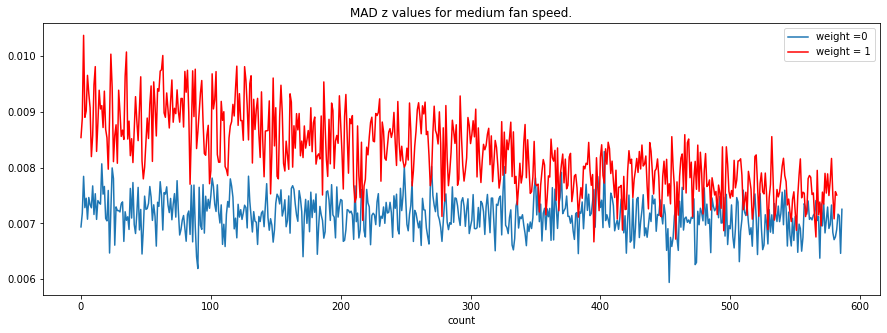

In [75]:
plot_mad_values(medium_0_data, medium_1_data , 'z', "medium")

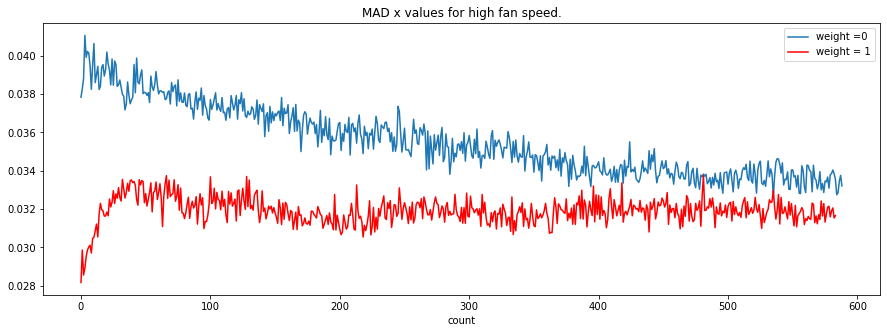

In [76]:
plot_mad_values(high_0_data, high_1_data , 'x', "high")

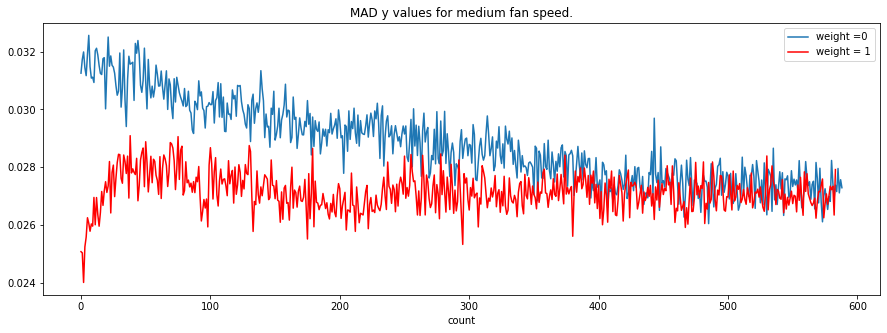

In [77]:
plot_mad_values(high_0_data, high_1_data , 'y', "medium")

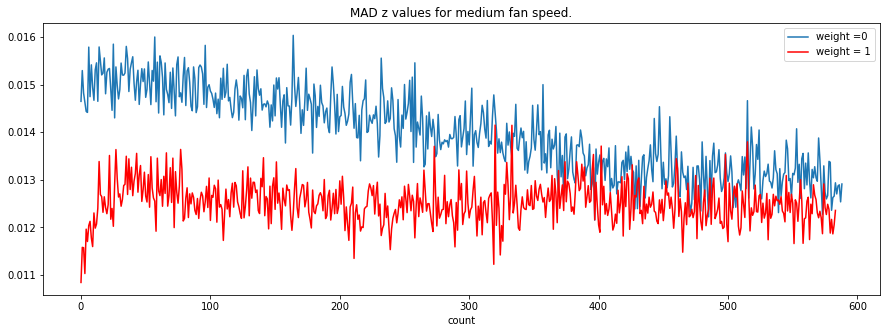

In [78]:
plot_mad_values(high_0_data, high_1_data , 'z', "medium")

In [66]:
## create a consolidated file containing the average x , y and z values of the all the fan speeds and with/with out weights.

In [93]:
def create_consolidated_mean_file(file_name):
    consolidated_df = pd.DataFrame()
        
    mean_f = file_name[['x','y','z','count']].groupby('count').mean()
    consolidated_df = consolidated_df.append(mean_f, ignore_index = True)
    consolidated_df['weight'] = file_name['weight'][0]
    consolidated_df['speed'] = file_name['speed']
    
    return consolidated_df
        


In [98]:
mean_values_file = pd.DataFrame()
mean_values_file = mean_values_file.append(create_consolidated_mean_file(low_0_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
579,-0.012446,0.204473,0.979378,0,0
580,-0.012410,0.204441,0.978962,0,0
581,-0.012639,0.204514,0.978799,0,0
582,-0.012358,0.204443,0.979775,0,0


In [99]:
mean_values_file = mean_values_file.append(create_consolidated_mean_file(low_1_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
1158,-0.019614,0.192742,0.981011,1,0
1159,-0.019465,0.192874,0.980581,1,0
1160,-0.019800,0.192981,0.981655,1,0
1161,-0.019785,0.192600,0.981448,1,0


In [100]:
mean_values_file = mean_values_file.append(create_consolidated_mean_file(medium_0_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
1745,-0.012105,0.205974,0.978179,0,1
1746,-0.011282,0.206038,0.978262,0,1
1747,-0.011448,0.205784,0.978572,0,1
1748,-0.012144,0.204849,0.978611,0,1


In [101]:
mean_values_file = mean_values_file.append(create_consolidated_mean_file(medium_1_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
2328,-0.019204,0.196035,0.980188,1,1
2329,-0.019390,0.195701,0.979614,1,1
2330,-0.019356,0.195129,0.980200,1,1
2331,-0.019441,0.195701,0.980945,1,1


In [102]:
mean_values_file = mean_values_file.append(create_consolidated_mean_file(high_0_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
2917,-0.010559,0.204578,0.976860,0,2
2918,-0.010913,0.205916,0.976003,0,2
2919,-0.010249,0.206277,0.978052,0,2
2920,-0.010386,0.205474,0.978706,0,2


In [103]:
mean_values_file = mean_values_file.append(create_consolidated_mean_file(high_1_data), ignore_index = True)
mean_values_file

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0
...,...,...,...,...,...
3501,-0.040137,0.230989,0.973179,1,2
3502,-0.040488,0.231562,0.973472,1,2
3503,-0.040720,0.230837,0.970625,1,2
3504,-0.040847,0.231682,0.970103,1,2


In [104]:
## save the file 
mean_values_file.to_csv("mean_readings.csv", index = False)

In [106]:
mean_readings = pd.read_csv("mean_readings.csv")
mean_readings.head()

,x,y,z,weight,speed
0,-0.012051,0.204719,0.978792,0,0
1,-0.011885,0.204990,0.979236,0,0
2,-0.011963,0.204851,0.979075,0,0
3,-0.012061,0.204712,0.979546,0,0
4,-0.011763,0.204802,0.979270,0,0


In [107]:
mean_readings.shape

(3506, 5)